In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from catboost import CatBoostRegressor
import pickle
from xgboost import XGBRegressor

In [360]:
data = pd.read_csv('ultiBreak.csv')

In [361]:
data.head()

,NOZZLE TEMP,PRINTING SPEED,INFILL PATTERN,INFILL DENSITY,AREA,UNLTIMATE BREAKING LOAD
0,200,10,L,92.5,41.382,105
1,200,15,C,95.0,41.382,140
2,200,20,Z,97.5,41.382,140
3,200,25,H,100.0,41.382,105
4,205,10,C,97.5,41.382,120


In [362]:

data.tail()

,NOZZLE TEMP,PRINTING SPEED,INFILL PATTERN,INFILL DENSITY,AREA,UNLTIMATE BREAKING LOAD
11,210,25,C,92.5,41.778,120
12,215,10,H,95.0,41.778,125
13,215,15,Z,92.5,41.778,130
14,215,20,C,100.0,41.778,130
15,215,25,L,97.5,41.778,145


In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NOZZLE TEMP              16 non-null     int64  
 1   PRINTING SPEED           16 non-null     int64  
 2   INFILL PATTERN           16 non-null     object 
 3   INFILL DENSITY           16 non-null     float64
 4   AREA                     16 non-null     float64
 5   UNLTIMATE BREAKING LOAD  16 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 896.0+ bytes


In [364]:
data.describe()

,NOZZLE TEMP,PRINTING SPEED,INFILL DENSITY,AREA,UNLTIMATE BREAKING LOAD
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,207.500000,17.500000,96.250000,41.580000,126.875000
std,5.773503,5.773503,2.886751,0.204494,19.989581
min,200.000000,10.000000,92.500000,41.382000,90.000000
25%,203.750000,13.750000,94.375000,41.382000,116.250000
50%,207.500000,17.500000,96.250000,41.580000,127.500000
75%,211.250000,21.250000,98.125000,41.778000,140.000000
max,215.000000,25.000000,100.000000,41.778000,170.000000


In [365]:
data.isnull().sum()

NOZZLE TEMP                0
PRINTING SPEED             0
INFILL PATTERN             0
INFILL DENSITY             0
AREA                       0
UNLTIMATE BREAKING LOAD    0
dtype: int64

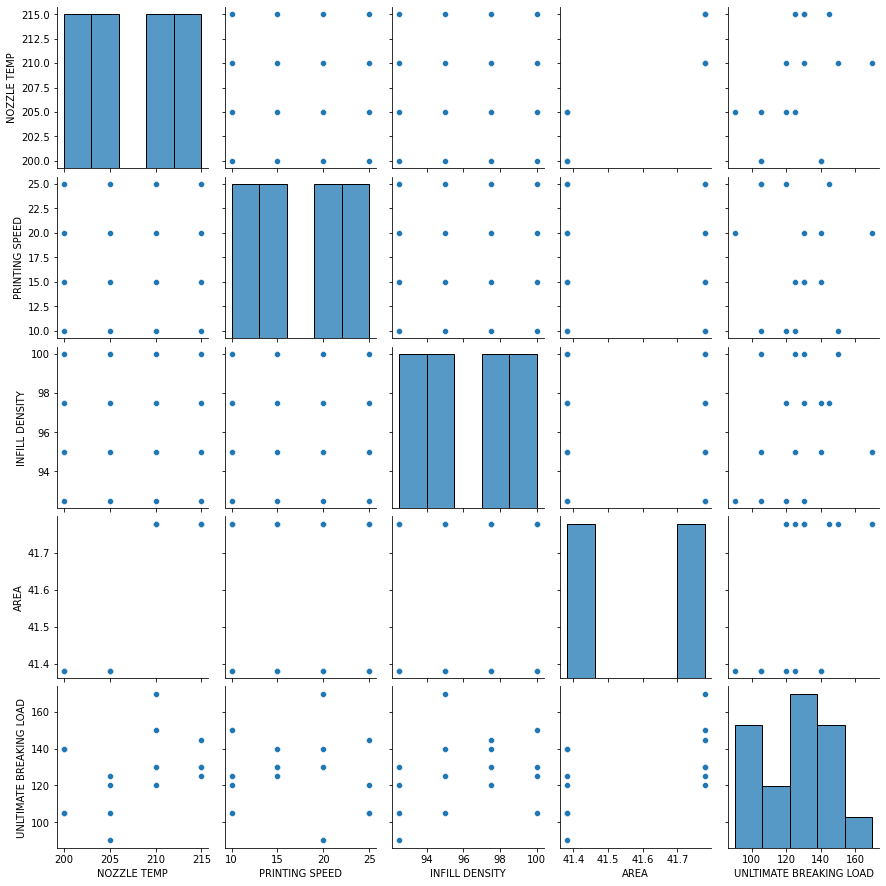

In [366]:
sns.pairplot(data)

# GRADIENT SORTED BREAKING LOAD 

In [367]:
a = data.sort_values(by="UNLTIMATE BREAKING LOAD", ascending=False).reset_index()
a.style.background_gradient(cmap="Greens")

,index,NOZZLE TEMP,PRINTING SPEED,INFILL PATTERN,INFILL DENSITY,AREA,UNLTIMATE BREAKING LOAD
0,10,210,20,L,95.000000,41.778000,170
1,8,210,10,Z,100.000000,41.778000,150
2,15,215,25,L,97.500000,41.778000,145
3,1,200,15,C,95.000000,41.382000,140
4,2,200,20,Z,97.500000,41.382000,140
5,9,210,15,H,97.500000,41.778000,130
6,13,215,15,Z,92.500000,41.778000,130
7,14,215,20,C,100.000000,41.778000,130
8,5,205,15,L,100.000000,41.382000,125
9,12,215,10,H,95.000000,41.778000,125


# Relatioin between process parameter and breaking load

<AxesSubplot:xlabel='NOZZLE TEMP', ylabel='UNLTIMATE BREAKING LOAD'>

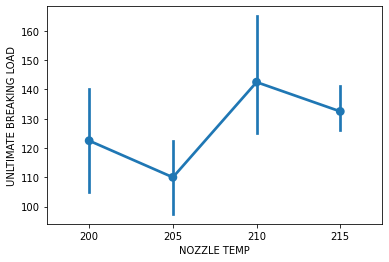

In [368]:
sns.pointplot(data=data,y='UNLTIMATE BREAKING LOAD',x='NOZZLE TEMP')

<AxesSubplot:xlabel='PRINTING SPEED', ylabel='UNLTIMATE BREAKING LOAD'>

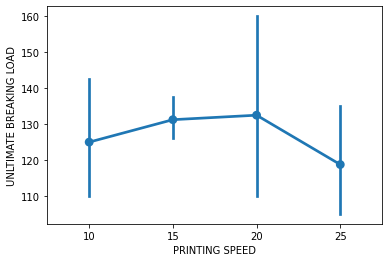

In [369]:
sns.pointplot(data=data,y='UNLTIMATE BREAKING LOAD',x='PRINTING SPEED')

<AxesSubplot:xlabel='INFILL DENSITY', ylabel='UNLTIMATE BREAKING LOAD'>

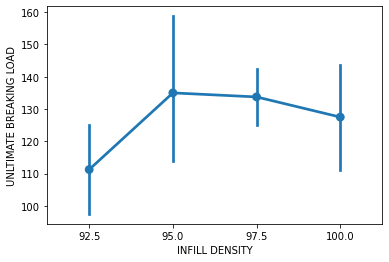

In [370]:
sns.pointplot(data=data,y='UNLTIMATE BREAKING LOAD',x='INFILL DENSITY')

<AxesSubplot:xlabel='AREA', ylabel='UNLTIMATE BREAKING LOAD'>

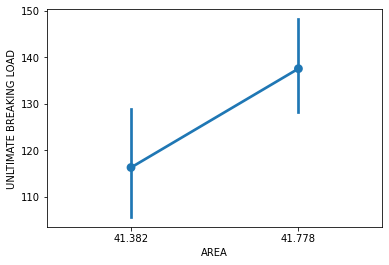

In [371]:
sns.pointplot(data=data,y='UNLTIMATE BREAKING LOAD',x='AREA')

<AxesSubplot:xlabel='INFILL PATTERN', ylabel='UNLTIMATE BREAKING LOAD'>

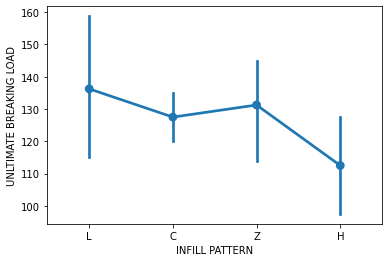

In [372]:
sns.pointplot(data=data,y='UNLTIMATE BREAKING LOAD',x='INFILL PATTERN')

# HANDILING CATOGRICAL DATA

In [373]:

data['INFILL PATTERN'].unique()

array(['L', 'C', 'Z', 'H'], dtype=object)

In [374]:
ord_enc = OrdinalEncoder()
data['infillpat'] = ord_enc.fit_transform(data[["INFILL PATTERN"]])



In [375]:
data

,NOZZLE TEMP,PRINTING SPEED,INFILL PATTERN,INFILL DENSITY,AREA,UNLTIMATE BREAKING LOAD,infillpat
0,200,10,L,92.5,41.382,105,2.0
1,200,15,C,95.0,41.382,140,0.0
2,200,20,Z,97.5,41.382,140,3.0
3,200,25,H,100.0,41.382,105,1.0
4,205,10,C,97.5,41.382,120,0.0
5,205,15,L,100.0,41.382,125,2.0
6,205,20,H,92.5,41.382,90,1.0
7,205,25,Z,95.0,41.382,105,3.0
8,210,10,Z,100.0,41.778,150,3.0
9,210,15,H,97.5,41.778,130,1.0


# FEATURE EXTRACTION

In [377]:
feature_cols= ['NOZZLE TEMP','PRINTING SPEED','infillpat','INFILL DENSITY','AREA']
x=data[feature_cols]
y=data['UNLTIMATE BREAKING LOAD']

In [378]:
x.head()

,NOZZLE TEMP,PRINTING SPEED,infillpat,INFILL DENSITY,AREA
0,200,10,2.0,92.5,41.382
1,200,15,0.0,95.0,41.382
2,200,20,3.0,97.5,41.382
3,200,25,1.0,100.0,41.382
4,205,10,0.0,97.5,41.382


In [379]:
y.head()

0    105
1    140
2    140
3    105
4    120
Name: UNLTIMATE BREAKING LOAD, dtype: int64

# SPLITING DATA

In [380]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# FINDING CORELEATION

                         NOZZLE TEMP  PRINTING SPEED  INFILL DENSITY  \
NOZZLE TEMP                 1.000000        0.000000        0.000000   
PRINTING SPEED              0.000000        1.000000        0.000000   
INFILL DENSITY              0.000000        0.000000        1.000000   
AREA                        0.894427        0.000000        0.000000   
UNLTIMATE BREAKING LOAD     0.361032       -0.101089        0.274384   
infillpat                   0.000000        0.000000        0.000000   

                             AREA  UNLTIMATE BREAKING LOAD  infillpat  
NOZZLE TEMP              0.894427                 0.361032   0.000000  
PRINTING SPEED           0.000000                -0.101089   0.000000  
INFILL DENSITY           0.000000                 0.274384   0.000000  
AREA                     1.000000                 0.548959   0.000000  
UNLTIMATE BREAKING LOAD  0.548959                 1.000000   0.202178  
infillpat                0.000000                 0.202178   1.

<AxesSubplot:>

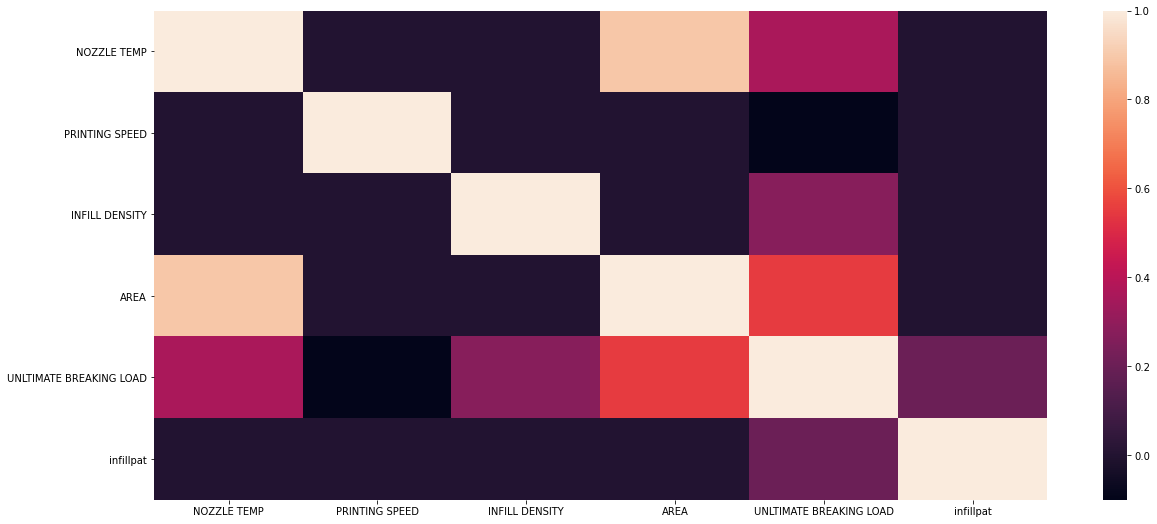

In [381]:
tc =  data.corr()
print(tc)
plt.subplots(figsize=(20,9))
sns.heatmap(tc)

In [382]:
comp_dict = {}

# MODEL CREATION

# Decision Tree Regressor

In [383]:
model = tree.DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(x)
r2 = metrics.r2_score(y_pred, y)

comp_dict['DecisionTree'] = r2
print(f'DecisionTree r2-score: {r2:0.5f}')

DecisionTree r2-score: 0.55689


[Text(630.2117647058824, 684.9359999999999, 'X[0] <= 207.5\nmse = 526.0\nsamples = 10\nvalue = 128.0'),
 Text(315.1058823529412, 532.728, 'X[3] <= 96.25\nmse = 286.0\nsamples = 5\nvalue = 112.0'),
 Text(157.5529411764706, 380.52, 'X[2] <= 2.0\nmse = 56.25\nsamples = 2\nvalue = 97.5'),
 Text(78.7764705882353, 228.312, 'mse = 0.0\nsamples = 1\nvalue = 90.0'),
 Text(236.3294117647059, 228.312, 'mse = 0.0\nsamples = 1\nvalue = 105.0'),
 Text(472.6588235294118, 380.52, 'X[2] <= 2.0\nmse = 205.556\nsamples = 3\nvalue = 121.667'),
 Text(393.88235294117646, 228.312, 'X[0] <= 202.5\nmse = 56.25\nsamples = 2\nvalue = 112.5'),
 Text(315.1058823529412, 76.10399999999993, 'mse = 0.0\nsamples = 1\nvalue = 105.0'),
 Text(472.6588235294118, 76.10399999999993, 'mse = 0.0\nsamples = 1\nvalue = 120.0'),
 Text(551.4352941176471, 228.312, 'mse = 0.0\nsamples = 1\nvalue = 140.0'),
 Text(945.3176470588236, 532.728, 'X[2] <= 1.5\nmse = 254.0\nsamples = 5\nvalue = 144.0'),
 Text(787.7647058823529, 380.52, 'X[3

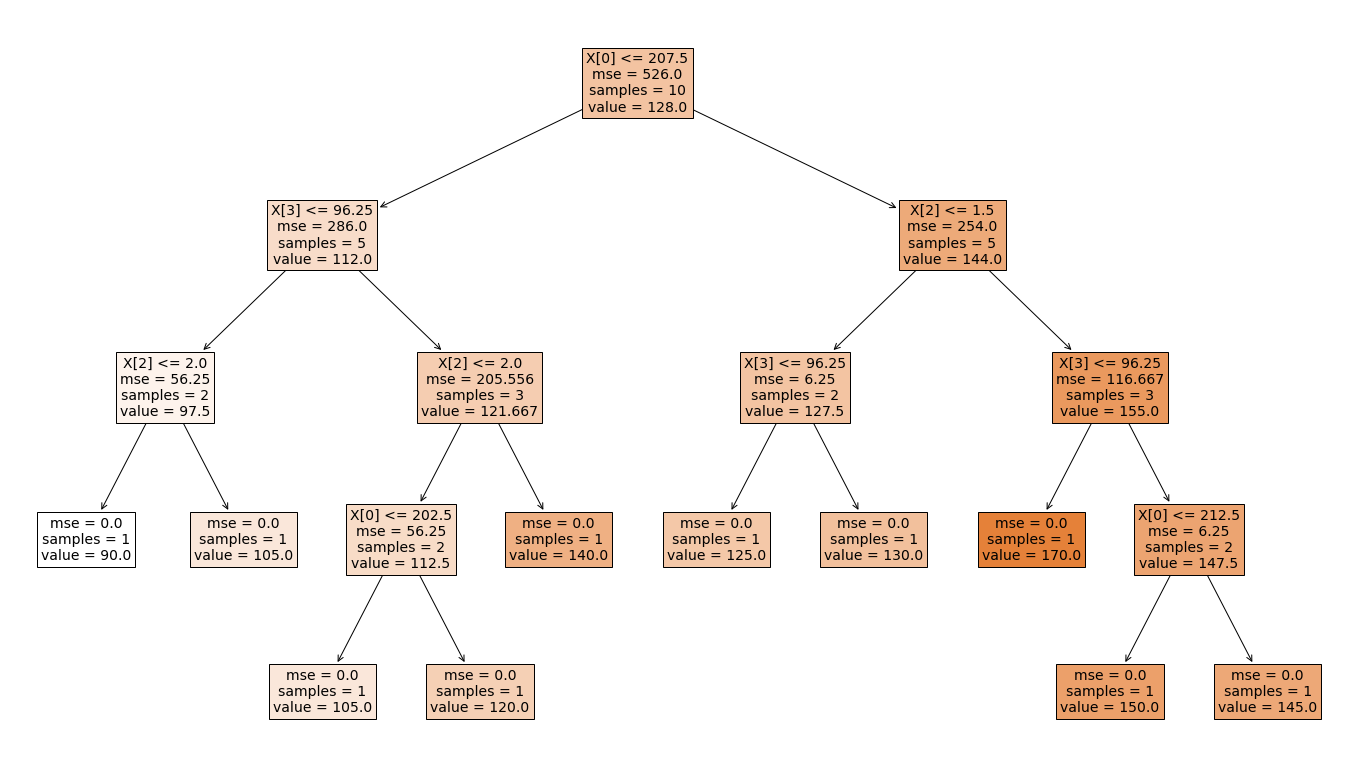

In [384]:
plt.figure(figsize=(24,14))
tree.plot_tree(model, filled=True, fontsize=14)

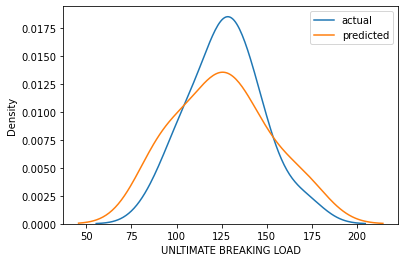

In [385]:
sns.kdeplot(y,label='actual')
sns.kdeplot(y_pred,label='predicted')
plt.legend(labels=["actual","predicted"])

# Random Forest Regressor

In [386]:
model = ensemble.RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(x)
r2 = metrics.r2_score(y_pred, y)

comp_dict['RandomForest'] = r2
print(f'RandomForest r2-score: {r2:0.5f}')

RandomForest r2-score: 0.35327


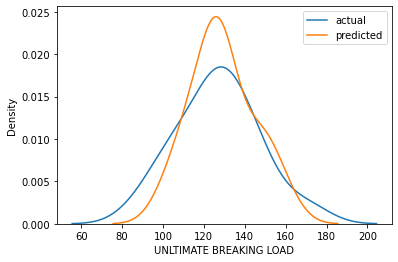

In [387]:
sns.kdeplot(y,label='actual')
sns.kdeplot(y_pred,label='predicted')
plt.legend(labels=["actual","predicted"])

# XGBoost Regressor

In [388]:
model = XGBRegressor(random_state=16)
model.fit(X_train, y_train)
y_pred = model.predict(x)
r2 = metrics.r2_score(y_pred, y)

comp_dict['XGBoost'] = r2
print(f'XGBoost r2-score: {r2:0.5f}')

XGBoost r2-score: 0.82107


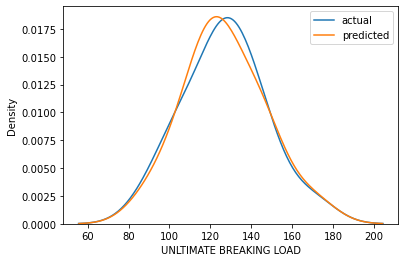

In [389]:
sns.kdeplot(y,label='actual')
sns.kdeplot(y_pred,label='predicted')
plt.legend(labels=["actual","predicted"])

# GradientBoosting Regressor

In [390]:
model = ensemble.GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(x)
r2 = metrics.r2_score(y_pred, y)

comp_dict['GradientBoost'] = r2
print(f'GradientBoost r2-score: {r2:0.5f}')

GradientBoost r2-score: 0.61270


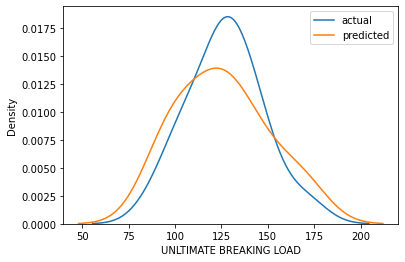

In [391]:
sns.kdeplot(y,label='actual')
sns.kdeplot(y_pred,label='predicted')
plt.legend(labels=["actual","predicted"])

# RIGID REGRESSION

In [392]:
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(x)
r2 = metrics.r2_score(y_pred, y)

comp_dict['rigidregression'] = r2
print(f'GradientBoost r2-score: {r2:0.5f}')

GradientBoost r2-score: 0.15542


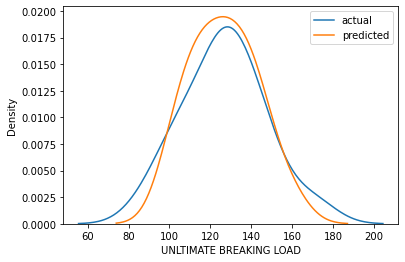

In [393]:
sns.kdeplot(y,label='actual')
sns.kdeplot(y_pred,label='predicted')
plt.legend(labels=["actual","predicted"])

# KNeighborsRegressor

In [394]:
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, y_train)
y_pred = model.predict(x)
r2 = metrics.r2_score(y_pred, y)

comp_dict['KNeighborsregression'] = r2
print(f'GradientBoost r2-score: {r2:0.5f}')


GradientBoost r2-score: 0.58869


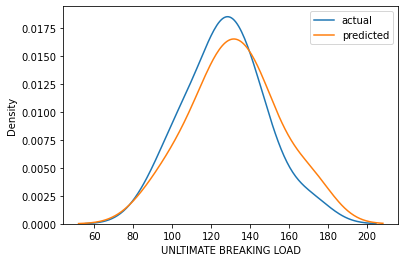

In [395]:
sns.kdeplot(y,label='actual')
sns.kdeplot(y_pred,label='predicted')
plt.legend(labels=["actual","predicted"])

# MODEL SELECTION

In [396]:
for i in comp_dict:
    print(i,comp_dict[i])

DecisionTree 0.5568919132774173
RandomForest 0.35327227240555314
XGBoost 0.821074907092667
GradientBoost 0.6126984230355399
rigidregression 0.15541814972871093
KNeighborsregression 0.5886889460154241


In [397]:
models=list(comp_dict.keys())
r2 = comp_dict.values()

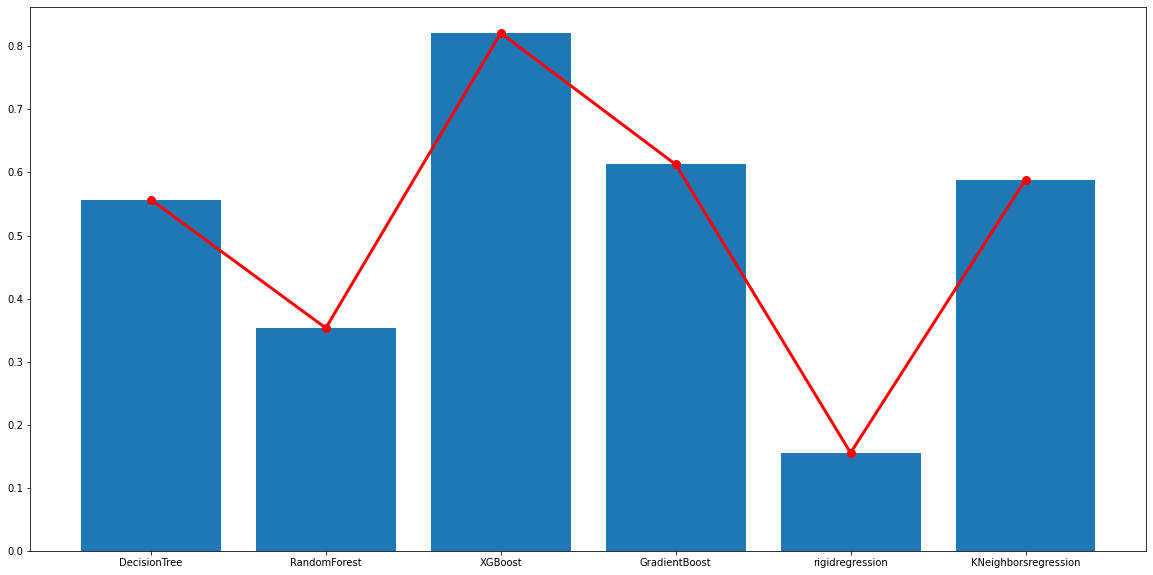

In [398]:
plt.figure(figsize=(20,10))
plt.bar(models,r2)
plt.plot(models,r2,color='red',marker='o',linewidth=3,markersize=8)


## XGboost regressor has the highest accuracy

In [399]:
model = XGBRegressor(random_state=16)
model.fit(X_train, y_train)
y_pred = model.predict(x)
r2 = metrics.r2_score(y_pred, y)

comp_dict['XGBoost'] = r2
print(f'XGBoost r2-score: {r2:0.5f}')


XGBoost r2-score: 0.82107


# saving the model

In [400]:
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
print("model saved sucessfully")


model saved sucessfully


# loading the model

In [401]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x, y)
print(result)

0.8231874933399986
